# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [34]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ulsteinvik
Processing Record 2 of Set 1 | belen
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | sar-e pul
Processing Record 7 of Set 1 | kota belud
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | ahau
City not found. Skipping...
Processing Record 13 of Set 1 | kone
Processing Record 14 of Set 1 | kuqa
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | sidney
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | lycksele
Processing Record 21 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 22 of Set 1 | cati

Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | raja
Processing Record 42 of Set 4 | dudinka
Processing Record 43 of Set 4 | akureyri
Processing Record 44 of Set 4 | punta arenas
Processing Record 45 of Set 4 | margate
Processing Record 46 of Set 4 | checker hall
City not found. Skipping...
Processing Record 47 of Set 4 | orhaneli
Processing Record 48 of Set 4 | vanino
Processing Record 49 of Set 4 | port moresby
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | new norfolk
Processing Record 2 of Set 5 | junin de los andes
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | kapit
Processing Record 5 of Set 5 | mongoumba
Processing Record 6 of Set 5 | fortaleza
Processing Record 7 of Set 5 | vung tau
Processing Record 8 of Set 5 | la'ie
Processing Record 9 of Set 5 | chinchilla
Processing Record 10 of Set 5 | viedma
Processing Record 11 of Set 5 | jamestown
Processing Record 12 of Set 5 | whitehorse
Processing Re

Processing Record 35 of Set 8 | papao
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | ciudad bolivar
Processing Record 38 of Set 8 | tangi
Processing Record 39 of Set 8 | chaozhou
Processing Record 40 of Set 8 | adh dhibiyah
City not found. Skipping...
Processing Record 41 of Set 8 | kurchatov
Processing Record 42 of Set 8 | uaboe
City not found. Skipping...
Processing Record 43 of Set 8 | gerolstein
Processing Record 44 of Set 8 | selfoss
Processing Record 45 of Set 8 | mamuju
Processing Record 46 of Set 8 | isola di capo rizzuto
Processing Record 47 of Set 8 | medenine
Processing Record 48 of Set 8 | sorong
Processing Record 49 of Set 8 | mil'kovo
Processing Record 0 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 1 of Set 9 | chonchi
Processing Record 2 of Set 9 | stuttgart
Processing Record 3 of Set 9 | ilha de mocambique
Processing Record 4 of Set 9 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 9 | wangan

Processing Record 21 of Set 12 | ndende
Processing Record 22 of Set 12 | americus
Processing Record 23 of Set 12 | nova sintra
Processing Record 24 of Set 12 | novodvinsk
Processing Record 25 of Set 12 | puerto deseado
Processing Record 26 of Set 12 | hayma'
City not found. Skipping...
Processing Record 27 of Set 12 | havran
Processing Record 28 of Set 12 | douala
Processing Record 29 of Set 12 | talcahuano
Processing Record 30 of Set 12 | nichinan
Processing Record 31 of Set 12 | greenville
Processing Record 32 of Set 12 | castelli
Processing Record 33 of Set 12 | taksimo
Processing Record 34 of Set 12 | natal
Processing Record 35 of Set 12 | wuhai
Processing Record 36 of Set 12 | arandelovac
City not found. Skipping...
Processing Record 37 of Set 12 | port augusta
Processing Record 38 of Set 12 | velikiy ustyug
Processing Record 39 of Set 12 | oranjemund
Processing Record 40 of Set 12 | prado
Processing Record 41 of Set 12 | keflavik
Processing Record 42 of Set 12 | hadibu
Processing

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ulsteinvik,62.3432,5.8487,1.84,75,12,2.68,NO,1701973038
1,belen,36.4891,36.2233,10.22,100,75,2.57,TR,1701973075
2,saipan,15.1355,145.7010,27.39,78,20,6.17,MP,1701972859
3,grytviken,-54.2811,-36.5092,0.21,86,70,11.28,GS,1701973076
4,iskateley,67.6803,53.1512,-14.43,96,100,3.58,RU,1701973076


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,1.84,75,12,2.68,NO,1701973038
1,belen,36.4891,36.2233,10.22,100,75,2.57,TR,1701973075
2,saipan,15.1355,145.7010,27.39,78,20,6.17,MP,1701972859
3,grytviken,-54.2811,-36.5092,0.21,86,70,11.28,GS,1701973076
4,iskateley,67.6803,53.1512,-14.43,96,100,3.58,RU,1701973076


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

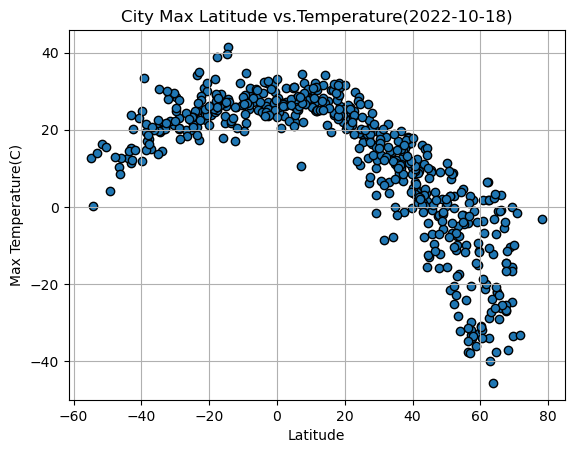

In [40]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs.Temperature(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

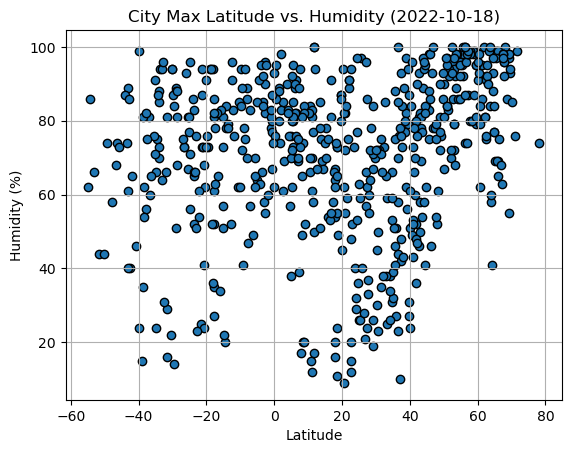

In [41]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

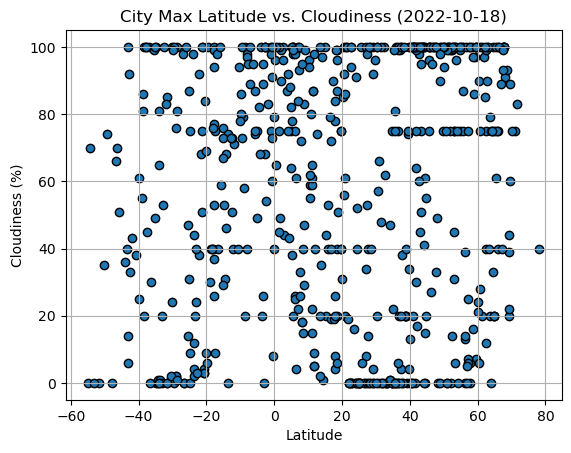

In [42]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

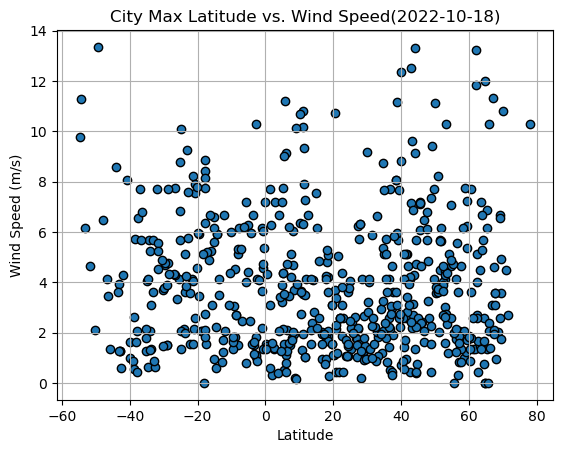

In [43]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ulsteinvik,62.3432,5.8487,1.84,75,12,2.68,NO,1701973038
1,belen,36.4891,36.2233,10.22,100,75,2.57,TR,1701973075
2,saipan,15.1355,145.7010,27.39,78,20,6.17,MP,1701972859
4,iskateley,67.6803,53.1512,-14.43,96,100,3.58,RU,1701973076
5,sar-e pul,35.8333,66.1667,7.55,27,100,0.85,AF,1701973076


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,0.21,86,70,11.28,GS,1701973076
7,avarua,-21.2078,-159.7750,25.03,73,75,8.23,CK,1701973076
9,mount gambier,-37.8333,140.7667,17.51,56,100,2.08,AU,1701973077
11,kone,-21.0595,164.8658,22.46,73,100,2.15,NC,1701972872
15,sidney,-33.8679,151.2073,21.61,85,81,3.09,AU,1701972972


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7439317290482393


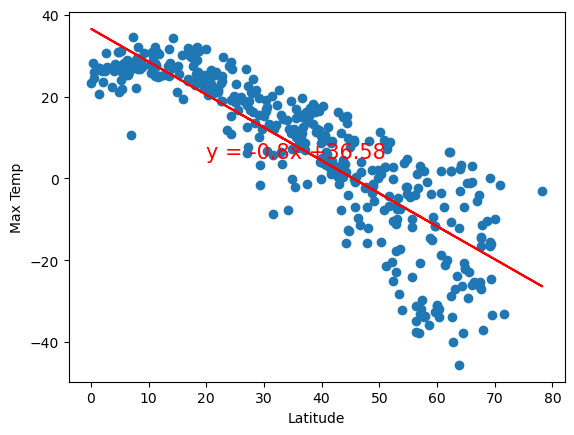

In [103]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.44051020910265787


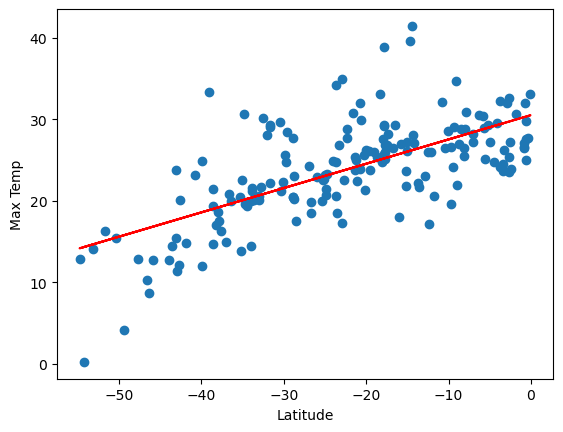

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** There is a strong correlation between maximum temperature and the latitudes for both north and south hemispheres. The rvalues of both hemispheres are close to 1.0. Other factors such as cloudiness, humidity and wind speed are not considered in this case.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10276190723115938


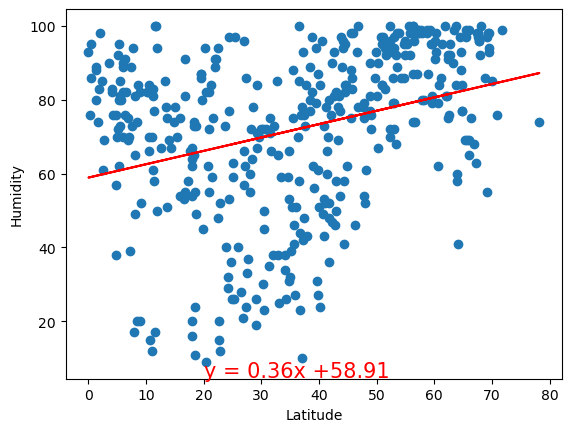

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.025572452657657157


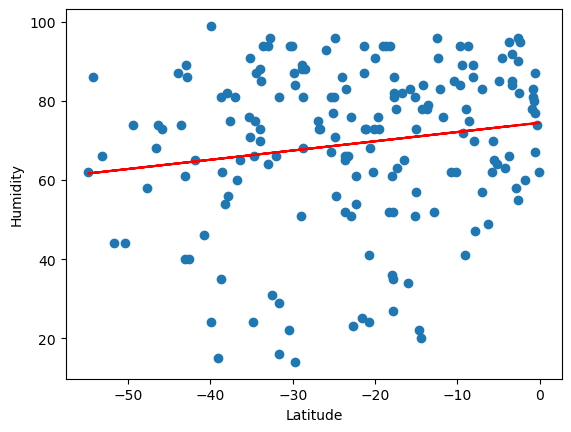

In [99]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between humidity and the latitude in the northern hemisphere. The correlation between the latitiude in the southern hemisphere and humidity is weak. Other factors such as cloudiness, temperature and wind speed are not considered in this case.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.007754172378564357


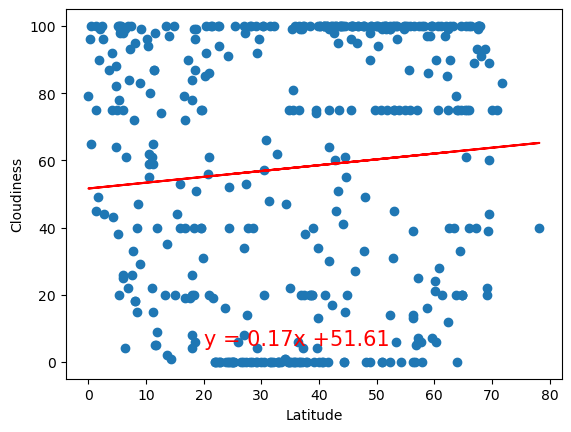

In [98]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.08258257467744311


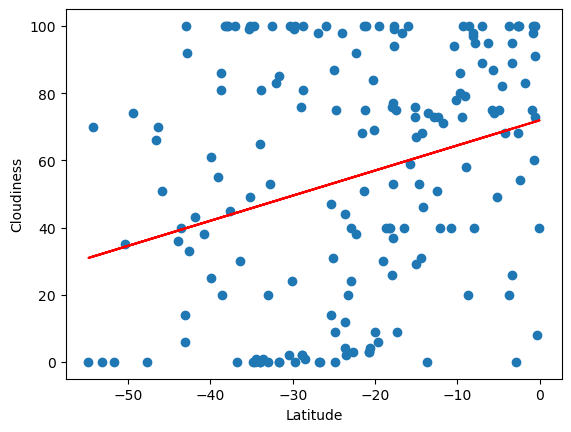

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation between cloudiness and the latitude for the southern hemisphere. The correlation between latitude in the northern hemisphere and cloudiness is weak. Other factors such as temperature, humidity and wind speed are not considered in this case.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0066943161443575525


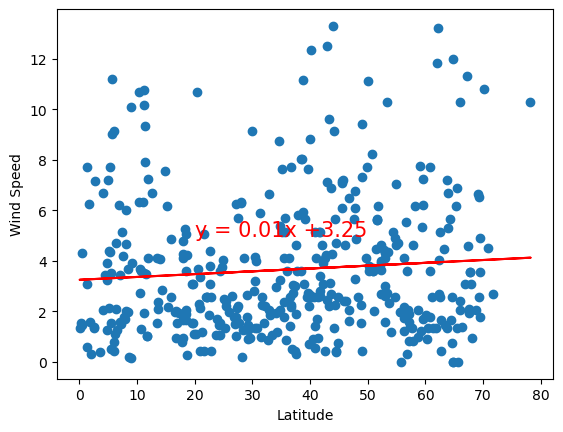

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

The r-value is: 0.005244481449233169


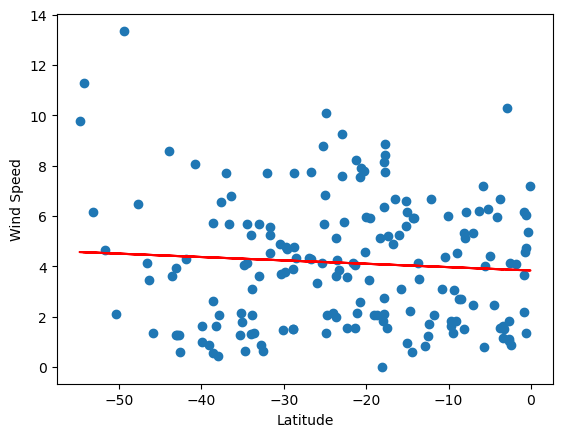

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between wind speed and the latitude for both the northern and southern hemispheres. The rvalues are not close to 1.0. Other factors such as temperature, humidity and cloudiness are not considered in this case.